In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pickle import load
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from utils import one_vs_all, plot_roc

In [2]:
with open("data/train_ds.pkl", "rb") as f:
    ds = load(f)

X, y, names = ds.get_X(), ds.get_y(), ds.get_feature_names()

In [3]:
with open("data/test_ds.pkl", "rb") as f:
    ds = load(f)

X_test, y_test, names = ds.get_X(), ds.get_y(), ds.get_feature_names()

In [4]:
param_grid = {
    'n_estimators': [40, 100, 200, 500],
    # 'max_depth': [50, 100, None],
    # 'max_features': [None, 'sqrt'],
    'max_samples': [0.8, 1.0]
}
gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, verbose=1)

In [5]:
gs.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0.8, 1.0],
                         'n_estimators': [40, 100, 200, 500]},
             verbose=1)

In [6]:
df = pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

In [7]:
df[["param_max_samples", "param_n_estimators", "mean_test_score", "mean_fit_time"]]

,param_max_samples,param_n_estimators,mean_test_score,mean_fit_time
3,0.8,500,0.757279,16.891602
2,0.8,200,0.756823,6.852191
1,0.8,100,0.756229,3.423110
7,1.0,500,0.754823,19.432568
6,1.0,200,0.754130,7.709448
0,0.8,40,0.753397,1.365865
5,1.0,100,0.752961,3.861945
4,1.0,40,0.750723,1.546289


In [8]:
# export_graphviz(gs.best_estimator_.estimators_[5], out_file="tree.dot")


In [9]:
model = gs.best_estimator_.fit(X, y)

In [10]:
y_pred = model.predict(X_test)

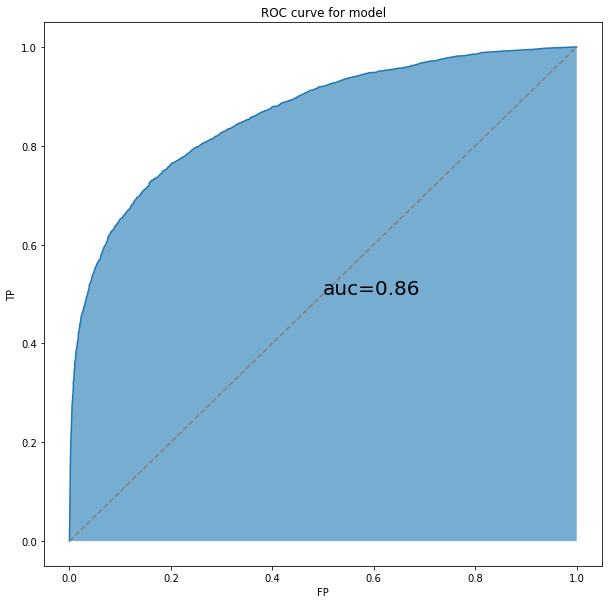

In [13]:
plot_roc(model, X_test, y_test, model_name="model")